In [1]:
import datetime
import json
import pandas as pd
from pprint import pprint

In [2]:
# Read the raw data and check what columns exist
originalrecords = pd.read_csv("Resources/DOHMH_New_York_City_Restaurant_Inspection_Results.csv", encoding="utf-8")
originalrecords.columns

Index(['CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE', 'PHONE',
       'CUISINE DESCRIPTION', 'INSPECTION DATE', 'ACTION', 'VIOLATION CODE',
       'VIOLATION DESCRIPTION', 'CRITICAL FLAG', 'SCORE', 'GRADE',
       'GRADE DATE', 'RECORD DATE', 'INSPECTION TYPE'],
      dtype='object')

In [3]:
# Print the head
originalrecords.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,40511702,NOTARO RESTAURANT,MANHATTAN,635,SECOND AVENUE,10016.0,2126863400,Italian,06/15/2015,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140Âº F.,Critical,30.0,NaN,NaN,08/28/2017,Cycle Inspection / Initial Inspection
1,40511702,NOTARO RESTAURANT,MANHATTAN,635,SECOND AVENUE,10016.0,2126863400,Italian,11/25/2014,Violations were cited in the following area(s).,20F,Current letter grade card not posted.,Not Critical,NaN,NaN,NaN,08/28/2017,Administrative Miscellaneous / Initial Inspection
2,50046354,VITE BAR,QUEENS,2507,BROADWAY,11106.0,3478134702,Italian,10/03/2016,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,2.0,NaN,NaN,08/28/2017,Pre-permit (Operational) / Initial Inspection
3,50061389,TACK'S CHINESE TAKE OUT,STATEN ISLAND,11C,HOLDEN BLVD,10314.0,7189839854,Chinese,05/17/2017,Violations were cited in the following area(s).,02G,Cold food item held above 41Âº F (smoked fish ...,Critical,46.0,NaN,NaN,08/28/2017,Pre-permit (Operational) / Initial Inspection
4,41516263,NO QUARTER,BROOKLYN,8015,5 AVENUE,11209.0,7187019180,American,03/30/2017,Violations were cited in the following area(s).,04M,Live roaches present in facility's food and/or...,Critical,18.0,NaN,NaN,08/28/2017,Cycle Inspection / Initial Inspection


In [4]:
presorted = originalrecords[~originalrecords['INSPECTION DATE'].str.contains("01/01/1900")]

modstr = "CUISINE DESCRIPTION"
temp2 = presorted[modstr].replace('CafÃ©/Coffee/Tea', 'Cafe/Coffee/Tea')
temp = pd.DataFrame(temp2)
del presorted[modstr]
presorted = presorted.join(temp)

modstr = 'ZIPCODE'
temp = pd.DataFrame(presorted['ZIPCODE'].astype(int))
del presorted[modstr]
presorted = presorted.join(temp)

len(presorted)
presorted.head()

modstr = "INSPECTION DATE"
insdates = presorted[modstr].tolist()

datestr = []
for insdate in insdates:
    dateobj = datetime.datetime.strptime(insdate,'%m/%d/%Y')
    datestr.append(dateobj.strftime("%Y/%m/%d"))
    
temp = pd.DataFrame({modstr:datestr})
del presorted[modstr]
presorted = presorted.join(temp)

print(len(presorted))
presorted.head()

398783


,CAMIS,DBA,BORO,BUILDING,STREET,PHONE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,CUISINE DESCRIPTION,ZIPCODE,INSPECTION DATE
0,40511702,NOTARO RESTAURANT,MANHATTAN,635,SECOND AVENUE,2126863400,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140Âº F.,Critical,30.0,NaN,NaN,08/28/2017,Cycle Inspection / Initial Inspection,Italian,10016,2015/06/15
1,40511702,NOTARO RESTAURANT,MANHATTAN,635,SECOND AVENUE,2126863400,Violations were cited in the following area(s).,20F,Current letter grade card not posted.,Not Critical,NaN,NaN,NaN,08/28/2017,Administrative Miscellaneous / Initial Inspection,Italian,10016,2014/11/25
2,50046354,VITE BAR,QUEENS,2507,BROADWAY,3478134702,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,2.0,NaN,NaN,08/28/2017,Pre-permit (Operational) / Initial Inspection,Italian,11106,2016/10/03
3,50061389,TACK'S CHINESE TAKE OUT,STATEN ISLAND,11C,HOLDEN BLVD,7189839854,Violations were cited in the following area(s).,02G,Cold food item held above 41Âº F (smoked fish ...,Critical,46.0,NaN,NaN,08/28/2017,Pre-permit (Operational) / Initial Inspection,Chinese,10314,2017/05/17
4,41516263,NO QUARTER,BROOKLYN,8015,5 AVENUE,7187019180,Violations were cited in the following area(s).,04M,Live roaches present in facility's food and/or...,Critical,18.0,NaN,NaN,08/28/2017,Cycle Inspection / Initial Inspection,American,11209,2017/03/30


In [5]:
sorted = presorted.sort_values(["CAMIS", "INSPECTION DATE"], ascending=True)
sorted.to_csv("nyrestaurants.csv", index=False, header=True)
len(sorted)
sorted.head()

,CAMIS,DBA,BORO,BUILDING,STREET,PHONE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,CUISINE DESCRIPTION,ZIPCODE,INSPECTION DATE
39514,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,7188924968,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,10.0,A,02/18/2016,08/28/2017,Cycle Inspection / Initial Inspection,Bakery,10462,2014/04/23
123432,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,7188924968,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Critical,7.0,A,05/18/2017,08/28/2017,Cycle Inspection / Initial Inspection,Bakery,10462,2014/08/26
78213,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,7188924968,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,6.0,A,02/09/2015,08/28/2017,Cycle Inspection / Initial Inspection,Bakery,10462,2016/06/16
351671,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,7188924968,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,7.0,A,05/18/2017,08/28/2017,Cycle Inspection / Initial Inspection,Bakery,10462,2017/01/25
399105,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,7188924968,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,10.0,A,02/18/2016,08/28/2017,Cycle Inspection / Initial Inspection,Bakery,10462,NaN


In [6]:
nyrestaurants = pd.read_csv("nyrestaurants.csv", encoding="utf-8")
print(len(nyrestaurants))
print(nyrestaurants.dtypes)
nyrestaurants.head()

398783
CAMIS                      int64
DBA                       object
BORO                      object
BUILDING                  object
STREET                    object
PHONE                     object
ACTION                    object
VIOLATION CODE            object
VIOLATION DESCRIPTION     object
CRITICAL FLAG             object
SCORE                    float64
GRADE                     object
GRADE DATE                object
RECORD DATE               object
INSPECTION TYPE           object
CUISINE DESCRIPTION       object
ZIPCODE                    int64
INSPECTION DATE           object
dtype: object


C:\Users\prati\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CAMIS,DBA,BORO,BUILDING,STREET,PHONE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,CUISINE DESCRIPTION,ZIPCODE,INSPECTION DATE
0,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,7188924968,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,10.0,A,02/18/2016,08/28/2017,Cycle Inspection / Initial Inspection,Bakery,10462,2014/04/23
1,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,7188924968,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Critical,7.0,A,05/18/2017,08/28/2017,Cycle Inspection / Initial Inspection,Bakery,10462,2014/08/26
2,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,7188924968,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,6.0,A,02/09/2015,08/28/2017,Cycle Inspection / Initial Inspection,Bakery,10462,2016/06/16
3,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,7188924968,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,7.0,A,05/18/2017,08/28/2017,Cycle Inspection / Initial Inspection,Bakery,10462,2017/01/25
4,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,7188924968,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,10.0,A,02/18/2016,08/28/2017,Cycle Inspection / Initial Inspection,Bakery,10462,NaN


In [7]:
foodtype = ["Bakery","Hamburgers","Delicatessen","Ice Cream"," Gelato"," Yogurt"," Ices","Hotdogs","Sandwiches/Salads/Mixed Buffet","Donuts","Bagels/Pretzels","Continental","Pizza","Soul Food","Steak","Pizza/Italian","Cafe/Coffee/Tea","Seafood","Tex-Mex","Bottled beverages"," including water"," sodas"," juices"," etc.","Pancakes/Waffles","Other","Chicken","Barbecue","Vegetarian","Juice"," Smoothies"," Fruit Salads","Sandwiches","Soups & Sandwiches","Tapas","Salads","Creole","Cajun","Creole/Cajun","Hotdogs/Pretzels","Southwestern","Fruits/Vegetables","Nuts/Confectionary","Soups","Californian","Not Listed/Not Applicable"]
ethnicity = ["Irish","American","Jewish/Kosher","Chinese","Caribbean","Italian","Polish","Latin (Cuban"," Dominican"," Puerto Rican"," South & Central American)","German","French","Mexican","Spanish","Mediterranean","Japanese","Greek","Thai","Indian","Korean","Russian","Ethiopian","Eastern European","Middle Eastern","Egyptian","English","Chinese/Cuban","Asian","Portuguese","Indonesian","Turkish","Moroccan","Hawaiian","Filipino","Brazilian","Vietnamese/Cambodian/Malaysia","Chilean","Afghan","Pakistani","Peruvian","African","Armenian","Bangladeshi","Czech","Iranian","Scandinavian","Polynesian","Australian","Chinese/Japanese"]
cuisinetype = []
for i in range(len(nyrestaurants)):
   if nyrestaurants.iloc[i,15] in foodtype:
       cuisinetype.append("food")
   elif nyrestaurants.iloc[i,15] in ethnicity:
       cuisinetype.append("ethnic")
   else:
       cuisinetype.append("other")
temp = pd.DataFrame({"Cuisine Type": cuisinetype})
nyrestaurants = nyrestaurants.join(temp)
nyrestaurants.head()

,CAMIS,DBA,BORO,BUILDING,STREET,PHONE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,CUISINE DESCRIPTION,ZIPCODE,INSPECTION DATE,Cuisine Type
0,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,7188924968,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,10.0,A,02/18/2016,08/28/2017,Cycle Inspection / Initial Inspection,Bakery,10462,2014/04/23,food
1,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,7188924968,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Critical,7.0,A,05/18/2017,08/28/2017,Cycle Inspection / Initial Inspection,Bakery,10462,2014/08/26,food
2,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,7188924968,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,6.0,A,02/09/2015,08/28/2017,Cycle Inspection / Initial Inspection,Bakery,10462,2016/06/16,food
3,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,7188924968,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,7.0,A,05/18/2017,08/28/2017,Cycle Inspection / Initial Inspection,Bakery,10462,2017/01/25,food
4,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,7188924968,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,10.0,A,02/18/2016,08/28/2017,Cycle Inspection / Initial Inspection,Bakery,10462,NaN,food


In [8]:
violationcodes = nyrestaurants['VIOLATION CODE'].unique()
nviolationcodes = len(violationcodes)
print(nviolationcodes)
violationcodes

98


array(['04L', '06D', '06C', '10F', '08A', '04A', '15I', '10B', '04J',
       '08C', '06A', '04N', '15L', '04H', '06B', '02G', '10E', '10A', nan,
       '02I', '10H', '09A', '20A', '22C', '16B', '06E', '02B', '06F',
       '10I', '04M', '10J', '02H', '04D', '04K', '20F', '09C', '09B',
       '04C', '10D', '05D', '22A', '05F', '16A', '02C', '08B', '02A',
       '05B', '20E', '04E', '02D', '05H', '20D', '04O', '22B', '18F',
       '15S', '04B', '10C', '16C', '16E', '16D', '03C', '05C', '03B',
       '22F', '04G', '15J', '04F', '05A', '03A', '22E', '06G', '05E',
       '15K', '07A', '03G', '18C', '06I', '18B', '18D', '22G', '10G',
       '03D', '15T', '04I', '15F', '15E', '20B', '06H', '16F', '15A',
       '05I', '02F', '02E', '03E', '03F', '02J', '15H'], dtype=object)

In [9]:
cuisines = nyrestaurants['CUISINE DESCRIPTION'].unique()
ncuisines = len(cuisines)
print(ncuisines)
cuisines

84


array(['Bakery', 'Hamburgers', 'Irish', 'American', 'Delicatessen',
       'Ice Cream, Gelato, Yogurt, Ices', 'Hotdogs', 'Jewish/Kosher',
       'Chinese', 'Sandwiches/Salads/Mixed Buffet', 'Caribbean', 'Donuts',
       'Bagels/Pretzels', 'Continental', 'Pizza', 'Soul Food', 'Italian',
       'Steak', 'Polish',
       'Latin (Cuban, Dominican, Puerto Rican, South & Central American)',
       'German', 'French', 'Pizza/Italian', 'Mexican', 'Spanish',
       'Cafe/Coffee/Tea', 'Seafood', 'Tex-Mex',
       'Bottled beverages, including water, sodas, juices, etc.',
       'Pancakes/Waffles', 'Other', 'Mediterranean', 'Japanese', 'Greek',
       'Thai', 'Indian', 'Korean', 'Chicken', 'Russian', 'Ethiopian',
       'Eastern European', 'Barbecue', 'Middle Eastern', 'Egyptian',
       'English', 'Chinese/Cuban', 'Asian', 'Portuguese', 'Indonesian',
       'Turkish', 'Moroccan', 'Hawaiian', 'Vegetarian', 'Filipino',
       'Juice, Smoothies, Fruit Salads', 'Sandwiches', 'Brazilian',
       'Vie

In [10]:
byfood = nyrestaurants.loc[nyrestaurants["Cuisine Type"] == "food", :]
byfood.head()

,CAMIS,DBA,BORO,BUILDING,STREET,PHONE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,CUISINE DESCRIPTION,ZIPCODE,INSPECTION DATE,Cuisine Type
0,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,7188924968,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,10.0,A,02/18/2016,08/28/2017,Cycle Inspection / Initial Inspection,Bakery,10462,2014/04/23,food
1,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,7188924968,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Critical,7.0,A,05/18/2017,08/28/2017,Cycle Inspection / Initial Inspection,Bakery,10462,2014/08/26,food
2,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,7188924968,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,6.0,A,02/09/2015,08/28/2017,Cycle Inspection / Initial Inspection,Bakery,10462,2016/06/16,food
3,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,7188924968,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,7.0,A,05/18/2017,08/28/2017,Cycle Inspection / Initial Inspection,Bakery,10462,2017/01/25,food
4,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,7188924968,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,10.0,A,02/18/2016,08/28/2017,Cycle Inspection / Initial Inspection,Bakery,10462,NaN,food


In [11]:
byethnicity = nyrestaurants.loc[nyrestaurants["Cuisine Type"] == "ethnic", :]
byethnicity.head()

,CAMIS,DBA,BORO,BUILDING,STREET,PHONE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,CUISINE DESCRIPTION,ZIPCODE,INSPECTION DATE,Cuisine Type
30,30191841,DJ REYNOLDS PUB AND RESTAURANT,MANHATTAN,351,WEST 57 STREET,2122452912,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,Not Critical,10.0,A,05/31/2016,08/28/2017,Cycle Inspection / Initial Inspection,Irish,10019,2014/05/09,ethnic
31,30191841,DJ REYNOLDS PUB AND RESTAURANT,MANHATTAN,351,WEST 57 STREET,2122452912,Violations were cited in the following area(s).,02I,Food prepared from ingredients at ambient temp...,Critical,26.0,NaN,NaN,08/28/2017,Cycle Inspection / Initial Inspection,Irish,10019,2015/04/07,ethnic
32,30191841,DJ REYNOLDS PUB AND RESTAURANT,MANHATTAN,351,WEST 57 STREET,2122452912,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,Not Critical,26.0,NaN,NaN,08/28/2017,Cycle Inspection / Initial Inspection,Irish,10019,2015/04/08,ethnic
33,30191841,DJ REYNOLDS PUB AND RESTAURANT,MANHATTAN,351,WEST 57 STREET,2122452912,Violations were cited in the following area(s).,10H,Proper sanitization not provided for utensil w...,Not Critical,12.0,NaN,NaN,08/28/2017,Cycle Inspection / Initial Inspection,Irish,10019,2015/04/29,ethnic
34,30191841,DJ REYNOLDS PUB AND RESTAURANT,MANHATTAN,351,WEST 57 STREET,2122452912,Violations were cited in the following area(s).,04H,"Raw, cooked or prepared food is adulterated, c...",Critical,26.0,NaN,NaN,08/28/2017,Cycle Inspection / Initial Inspection,Irish,10019,2015/05/26,ethnic


In [12]:
# By food type
groupByCuisineRest = byfood.groupby(['CUISINE DESCRIPTION','DBA'])
perRestaurant = pd.DataFrame({'# of violations':groupByCuisineRest['CAMIS'].count()})
print(perRestaurant['# of violations'].sum())
perRestaurant.head()

104809


# of violations
CUISINE DESCRIPTION DBA                                     
Bagels/Pretzels     A&R HOT BAGELS                         3
                    ABSOLUTE BAGELS                       15
                    ACE HOT BAGEL & DELI                  26
                    ACTS III BAGELS                       16
                    AMERICAN NEW YORK BAGEL               17

In [13]:
# By ethnicity
groupByCuisineRest = byethnicity.groupby(['CUISINE DESCRIPTION','DBA'])
perRestaurant = pd.DataFrame({'# of violations':groupByCuisineRest['CAMIS'].count()})
print(perRestaurant['# of violations'].sum())
perRestaurant.head()

267565


# of violations
CUISINE DESCRIPTION DBA                                            
Afghan              AFGHAN KEBAB HOUSE                            4
                    AFGHAN KEBAB HOUSE #1                        11
                    AFGHAN KEBOB HOUSE                           15
                    ARIA KABAB                                   14
                    ARIA KABAB /TARIQ AFGHAN KABAB               23

In [14]:
# All restaurants
groupByCuisineRest = nyrestaurants.groupby(['CUISINE DESCRIPTION','DBA'])
perRestaurant = pd.DataFrame({'# of violations':groupByCuisineRest['CAMIS'].count()})
print(perRestaurant['# of violations'].sum())
perRestaurant.head()

398783


# of violations
CUISINE DESCRIPTION DBA                                            
Afghan              AFGHAN KEBAB HOUSE                            4
                    AFGHAN KEBAB HOUSE #1                        11
                    AFGHAN KEBOB HOUSE                           15
                    ARIA KABAB                                   14
                    ARIA KABAB /TARIQ AFGHAN KABAB               23

In [15]:
# By food
groupByCuisine = byfood.groupby(['CUISINE DESCRIPTION'])
perType = pd.DataFrame({'# of violations':groupByCuisine['CAMIS'].count()})
nRestPerCuisine = pd.DataFrame({'# of restaurants':groupByCuisine['CAMIS'].nunique()})
perType['# of restaurants'] = nRestPerCuisine['# of restaurants']
perType["nViol_Rest"] = perType['# of violations'] /perType['# of restaurants']
perType.head()

,# of violations,# of restaurants,nViol_Rest
CUISINE DESCRIPTION,,,
Bagels/Pretzels,2795,173,16.156069
Bakery,11946,726,16.454545
Barbecue,858,52,16.500000
Cafe/Coffee/Tea,15562,1547,10.059470
Cajun,128,10,12.800000


In [16]:
# By ethnicity
groupByCuisine = byethnicity.groupby(['CUISINE DESCRIPTION'])
perEthnicity = pd.DataFrame({'# of violations':groupByCuisine['CAMIS'].count()})
nRestPerCuisine = pd.DataFrame({'# of restaurants':groupByCuisine['CAMIS'].nunique()})
perEthnicity['# of restaurants'] = nRestPerCuisine['# of restaurants']
perEthnicity["nViol_Rest"] = perEthnicity['# of violations'] /perEthnicity['# of restaurants']
perEthnicity.head()

,# of violations,# of restaurants,nViol_Rest
CUISINE DESCRIPTION,,,
Afghan,221,16,13.812500
African,1426,71,20.084507
American,90954,6093,14.927622
Armenian,484,36,13.444444
Asian,6254,366,17.087432


In [17]:
# All restaurants
groupByCuisine = nyrestaurants.groupby(['CUISINE DESCRIPTION'])
perCuisine = pd.DataFrame({'# of violations':groupByCuisine['CAMIS'].count()})
nRestPerCuisine = pd.DataFrame({'# of restaurants':groupByCuisine['CAMIS'].nunique()})
perCuisine['# of restaurants'] = nRestPerCuisine['# of restaurants']
perCuisine["nViol_Rest"] = perCuisine['# of violations'] /perCuisine['# of restaurants']
perCuisine.head()

,# of violations,# of restaurants,nViol_Rest
CUISINE DESCRIPTION,,,
Afghan,221,16,13.812500
African,1426,71,20.084507
American,90954,6093,14.927622
Armenian,484,36,13.444444
Asian,6254,366,17.087432


In [18]:
top_ten_type = perType.nlargest(10, '# of restaurants')
top_ten_type['Food Types'] = top_ten_type.index
top_ten_type.rename(columns={"# of restaurants": "Restaurant Number", "nViol_Rest": "Violations per Restaurant"}, inplace = True)
top_ten_ethnicity = perEthnicity.nlargest(10, '# of restaurants')
top_ten_ethnicity['Ethnicity'] = top_ten_ethnicity.index
top_ten_ethnicity.rename(columns={"# of restaurants": "Restaurant Number", "nViol_Rest": "Violations per Restaurant"}, inplace = True)
top_ten_type

,# of violations,Restaurant Number,Violations per Restaurant,Food Types
CUISINE DESCRIPTION,,,,
Cafe/Coffee/Tea,15562,1547,10.059470,Cafe/Coffee/Tea
Pizza,18752,1165,16.096137,Pizza
Bakery,11946,726,16.454545,Bakery
Donuts,5614,529,10.612476,Donuts
Pizza/Italian,8728,485,17.995876,Pizza/Italian
Chicken,6080,447,13.601790,Chicken
Sandwiches,4665,413,11.295400,Sandwiches
Hamburgers,5424,388,13.979381,Hamburgers
Delicatessen,6203,301,20.607973,Delicatessen


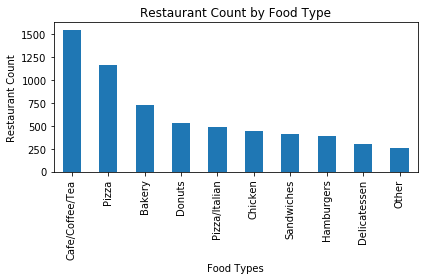

In [32]:
import matplotlib.pyplot as plt
top_ten_type.plot.bar('Food Types', 'Restaurant Number', legend = '')
plt.title('Restaurant Count by Food Type')
plt.ylabel('Restaurant Count')
plt.tight_layout()
plt.savefig('Restaurant Count by Food Type.png')

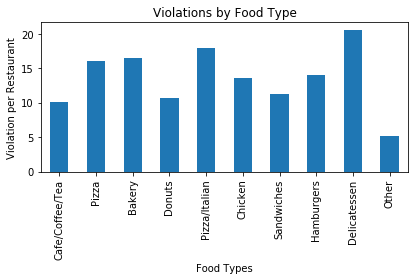

In [31]:
top_ten_type.plot.bar('Food Types', 'Violations per Restaurant', legend = '')
plt.title('Violations by Food Type')
plt.ylabel('Violation per Restaurant')
plt.tight_layout()
plt.savefig('Violations by Food Type.png')

In [21]:
top_ten_ethnicity

,# of violations,Restaurant Number,Violations per Restaurant,Ethnicity
CUISINE DESCRIPTION,,,,
American,90954,6093,14.927622,American
Chinese,42320,2398,17.648040,Chinese
Italian,17732,1023,17.333333,Italian
Japanese,14489,848,17.086085,Japanese
Mexican,15215,844,18.027251,Mexican
Caribbean,13019,670,19.431343,Caribbean
Spanish,11695,624,18.741987,Spanish
Asian,6254,366,17.087432,Asian
Indian,6184,334,18.514970,Indian


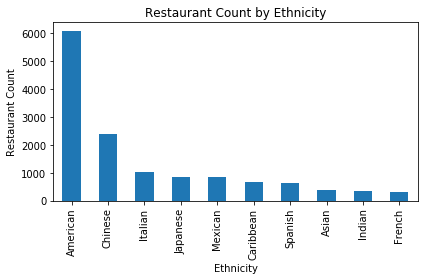

In [33]:
top_ten_ethnicity.plot.bar('Ethnicity', 'Restaurant Number', legend = '')
plt.title('Restaurant Count by Ethnicity')
plt.ylabel('Restaurant Count')
plt.tight_layout()
plt.savefig('Restaurant Count by Ethnicity.png')

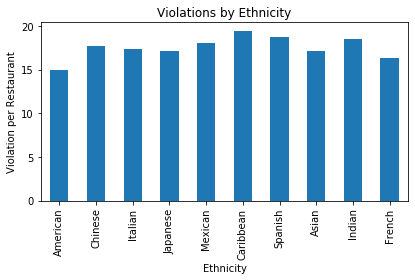

In [34]:
top_ten_ethnicity.plot.bar('Ethnicity', 'Violations per Restaurant', legend = '')
plt.title('Violations by Ethnicity')
plt.ylabel('Violation per Restaurant')
plt.tight_layout()
plt.savefig('Violations by Ethnicity.png')